In [83]:
#importing libraries 

## For plotting or visualization
import matplotlib.pyplot as plt

## For arrays 
import numpy as np

## tensorflow for neural network
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential

## Flatten coverts multi dim arrays into one dim array
from tensorflow.keras.layers import Flatten , Dense 

In [84]:
# loading the data 
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [85]:
# Checking the dimensions and shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label of this picture is :   0


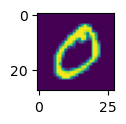

Label of this picture is :   4


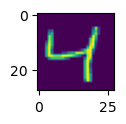

Label of this picture is :   1


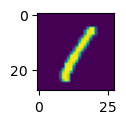

Label of this picture is :   9


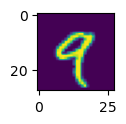

In [86]:
# data samples with its labels 
def data_sample(labels , data):
    for i in range(1,5):
        plt.figure(figsize=(1,1))
        print("Label of this picture is :  " , labels[i] );
        plt.imshow(data[i]);
        plt.show();
    
# Calling the function 
data_sample(y_train , X_train);

In [87]:
# Standardizing the data for analysis.
X_train = X_train/255
x_test = X_test/255

In [88]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [89]:
# To create linear stack layers we use Sequential model.
model = Sequential()

In [90]:
# Creating layers in a network.
# Using Flatten layer to covert multi dim into one dim.
model.add(Flatten(input_shape=(28,28)))
# creating hidden layer  with 128 neurons and ReLU as activation function
model.add(Dense(128, activation="relu"))
#creating output layer  with 10 neurons (for each digit from 0-9) and softmax as activation function for classification.
model.add(Dense(10,activation="softmax"))

In [91]:
# Checking the summary of our neural network
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
# compiling the model.
model.compile(optimizer="Adam" , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])

In [93]:
# Feeding inputs and data  to the model.
history = model.fit(X_train , y_train , batch_size = 64 , verbose=1 , epochs=20 , validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.3336 - accuracy: 0.9056 - val_loss: 0.2031 - val_accuracy: 0.9420
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1549 - accuracy: 0.9552 - val_loss: 0.1313 - val_accuracy: 0.9637
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1085 - accuracy: 0.9683 - val_loss: 0.1132 - val_accuracy: 0.9669
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0834 - accuracy: 0.9757 - val_loss: 0.0996 - val_accuracy: 0.9713
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0648 - accuracy: 0.9814 - val_loss: 0.0965 - val_accuracy: 0.9724
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0520 - accuracy: 0.9850 - val_loss: 0.0882 - val_accuracy: 0.9732
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0421 - accuracy: 0.9881 - val_loss: 0.0813 - val_accuracy: 0.9767
Epoch 

In [94]:
# Evaluation of our model.
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 22.3569 - accuracy: 0.9751


[22.356903076171875, 0.9750999808311462]

In [95]:
y_pred = model.predict(X_test)
y_pred

  1/313 [..............................] - ETA: 21s

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
predictions = np.argmax(y_pred , axis=1)

In [97]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

label of the picture is :  7
Prediction of our model is :  7


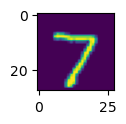

label of the picture is :  2
Prediction of our model is :  2


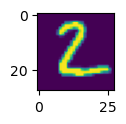

label of the picture is :  1
Prediction of our model is :  1


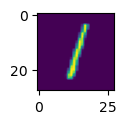

label of the picture is :  0
Prediction of our model is :  0


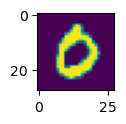

label of the picture is :  4
Prediction of our model is :  4


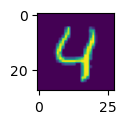

label of the picture is :  1
Prediction of our model is :  1


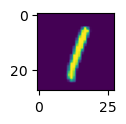

label of the picture is :  4
Prediction of our model is :  4


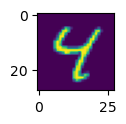

label of the picture is :  9
Prediction of our model is :  9


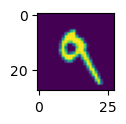

label of the picture is :  5
Prediction of our model is :  5


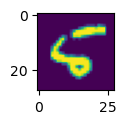

label of the picture is :  9
Prediction of our model is :  9


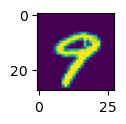

label of the picture is :  0
Prediction of our model is :  0


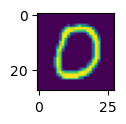

label of the picture is :  6
Prediction of our model is :  6


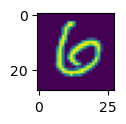

label of the picture is :  9
Prediction of our model is :  9


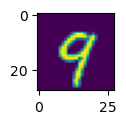

label of the picture is :  0
Prediction of our model is :  0


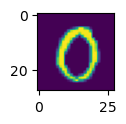

label of the picture is :  1
Prediction of our model is :  1


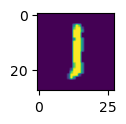

label of the picture is :  5
Prediction of our model is :  5


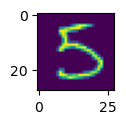

label of the picture is :  9
Prediction of our model is :  9


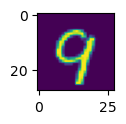

label of the picture is :  7
Prediction of our model is :  7


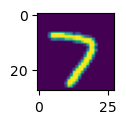

label of the picture is :  3
Prediction of our model is :  8


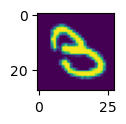

label of the picture is :  4
Prediction of our model is :  4


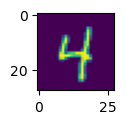

label of the picture is :  9
Prediction of our model is :  9


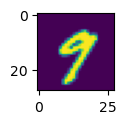

label of the picture is :  6
Prediction of our model is :  6


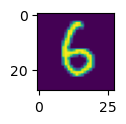

label of the picture is :  6
Prediction of our model is :  6


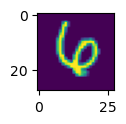

label of the picture is :  5
Prediction of our model is :  5


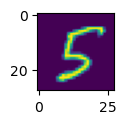

label of the picture is :  4
Prediction of our model is :  4


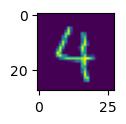

label of the picture is :  0
Prediction of our model is :  0


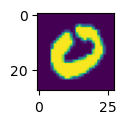

label of the picture is :  7
Prediction of our model is :  7


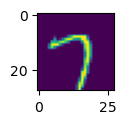

label of the picture is :  4
Prediction of our model is :  4


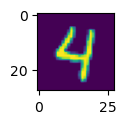

label of the picture is :  0
Prediction of our model is :  0


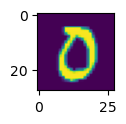

label of the picture is :  1
Prediction of our model is :  1


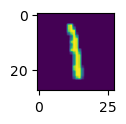

label of the picture is :  3
Prediction of our model is :  3


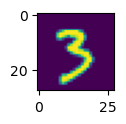

label of the picture is :  1
Prediction of our model is :  1


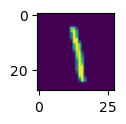

label of the picture is :  3
Prediction of our model is :  3


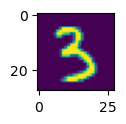

label of the picture is :  4
Prediction of our model is :  4


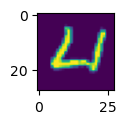

label of the picture is :  7
Prediction of our model is :  7


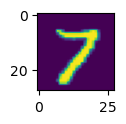

label of the picture is :  2
Prediction of our model is :  2


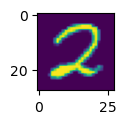

label of the picture is :  7
Prediction of our model is :  7


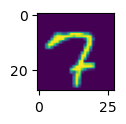

label of the picture is :  1
Prediction of our model is :  1


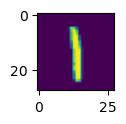

label of the picture is :  2
Prediction of our model is :  2


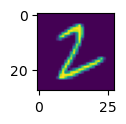

label of the picture is :  1
Prediction of our model is :  1


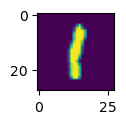

label of the picture is :  1
Prediction of our model is :  1


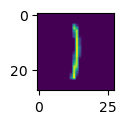

label of the picture is :  7
Prediction of our model is :  7


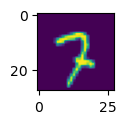

label of the picture is :  4
Prediction of our model is :  4


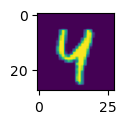

label of the picture is :  2
Prediction of our model is :  2


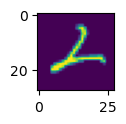

label of the picture is :  3
Prediction of our model is :  3


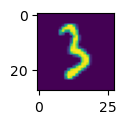

label of the picture is :  5
Prediction of our model is :  5


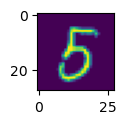

label of the picture is :  1
Prediction of our model is :  1


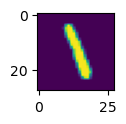

label of the picture is :  2
Prediction of our model is :  2


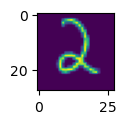

label of the picture is :  4
Prediction of our model is :  4


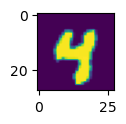

label of the picture is :  4
Prediction of our model is :  4


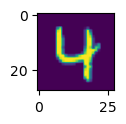

number of correct decisions : 49
number of wrong decisions :  1


In [98]:
# to verfiy our predictions .
def verfiy(label , pre , test):
    correct = 0;
    wrong = 0;
    for i in range(0,50):
        plt.figure(figsize=(1,1))
        print("label of the picture is : ", label[i]);
        print("Prediction of our model is : " , pre[i]);
        plt.imshow(test[i])
        plt.show()
        
        if (pre[i] == label[i]):
            correct = correct + 1 
        else : 
            wrong = wrong + 1
        
    print("number of correct decisions :" , correct);
    print("number of wrong decisions : " , wrong);

# calling the function.
verfiy(y_test , predictions , X_test)

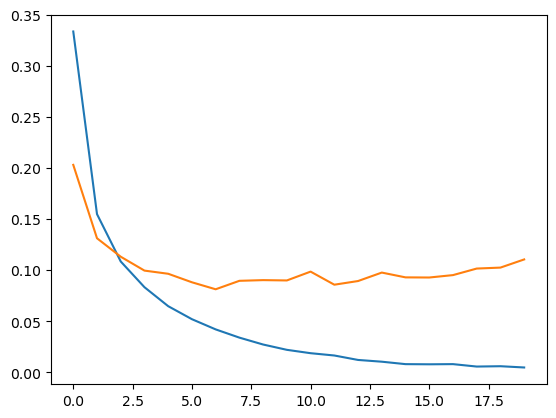

In [99]:
# plotting the graph 
# loss vs val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

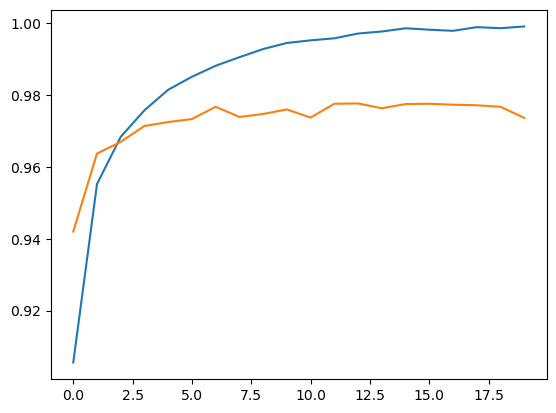

In [100]:
# accuracy vs val_accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])